In [1]:
graph = {'A': ['B', 'C'],
             'B': ['C', 'D'],
             'C': ['D'],
             'D': ['C'],
             'E': ['F'],
             'F': ['C']}

In [52]:
import random
import string
import itertools
import time
            
# for entry in graph:
#     print ('\n\n' + entry + '  :  ' +  str(graph[entry]))
    
def find_shortest_path_naive(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return path
    if start not in graph:
        return None
    shortest = None
    for node in graph[start]:
        if node not in path:
            newpath = find_shortest_path(graph, node, end, path)
            if newpath:
                if not shortest or len(newpath) < len(shortest):
                    shortest = newpath
    return shortest

def floydWarshall(graph):
    nodes = graph.keys()

    distance = {}

    for n in nodes:
        distance[n] = {}

        for k in nodes:
            if k in graph[n]:
                distance[n][k] = 1
            else:
                distance[n][k] = float("inf")

    for k in nodes:
        for i in nodes:
            for j in nodes:
                distance[i][j] = min (distance[i][j], distance[i][k] + distance[k][j])
                
    #print(distance)


def build_graph(n_nodes):
    nodes = []
    name_length = 8
    probabiliy = 0.2
    
    for i in range(n_nodes):
        hash = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(name_length))
        nodes.append(hash)
        
    graph = {}
    
    for node in nodes:
        graph[node]= []
        for other_node in nodes:
            if random.uniform(0.0, 1.0) < probabiliy:
                graph[node].append(other_node)
                
    #print(graph)            
    return graph


n_nodes = 0
times_naive = {}
times_floyd = {}
while True:
    try:
        n_nodes = n_nodes + 1
        graph = build_graph(n_nodes)
        
        combinations = itertools.combinations(graph, 2)
        
        start_time = time.time()
        
        for combination in combinations:
            #print('\n# Shortest path between: ' + str(combination))
            #print(find_shortest_path(graph, combination[0], combination[1]))
            find_shortest_path_naive(graph, combination[0], combination[1])
            pass
            
        stopped_time = time.time() - start_time
        print("n_nodes naive: " + str(n_nodes) + ":%s seconds" % stopped_time)
        times_naive[n_nodes] = stopped_time
        
        
        start_time = time.time()
        floydWarshall(graph)
        stopped_time = time.time() - start_time
        print("n_nodes floyd: " + str(n_nodes) + ":%s seconds" % stopped_time)
        times_floyd[n_nodes] = stopped_time
        
    except KeyboardInterrupt:
        break
        
        
# Floyd

n_nodes naive: 1:9.5367431640625e-07 seconds
n_nodes floyd: 1:1.0013580322265625e-05 seconds
n_nodes naive: 2:2.86102294921875e-06 seconds
n_nodes floyd: 2:2.4080276489257812e-05 seconds
n_nodes naive: 3:1.0013580322265625e-05 seconds
n_nodes floyd: 3:2.8133392333984375e-05 seconds
n_nodes naive: 4:1.5020370483398438e-05 seconds
n_nodes floyd: 4:4.9114227294921875e-05 seconds
n_nodes naive: 5:1.5020370483398438e-05 seconds
n_nodes floyd: 5:8.296966552734375e-05 seconds
n_nodes naive: 6:4.00543212890625e-05 seconds
n_nodes floyd: 6:0.00015211105346679688 seconds
n_nodes naive: 7:4.076957702636719e-05 seconds
n_nodes floyd: 7:0.0002219676971435547 seconds
n_nodes naive: 8:7.200241088867188e-05 seconds
n_nodes floyd: 8:0.0003180503845214844 seconds
n_nodes naive: 9:0.0005390644073486328 seconds
n_nodes floyd: 9:0.0004220008850097656 seconds
n_nodes naive: 10:0.00041222572326660156 seconds
n_nodes floyd: 10:0.000637054443359375 seconds
n_nodes naive: 11:0.0015020370483398438 seconds
n_node

In [49]:
print(times_naive)
print(times_floyd)

{1: 9.5367431640625e-07, 2: 3.0994415283203125e-06, 3: 5.0067901611328125e-06, 4: 7.867813110351562e-06, 5: 3.0040740966796875e-05, 6: 2.5987625122070312e-05, 7: 3.695487976074219e-05, 8: 7.796287536621094e-05, 9: 0.00031495094299316406, 10: 0.0005609989166259766, 11: 0.0010809898376464844, 12: 0.014372110366821289, 13: 0.002110004425048828, 14: 0.01454615592956543, 15: 0.1343679428100586, 16: 0.4520299434661865, 17: 1.6338441371917725, 18: 1.3858599662780762}
{1: 1.3113021850585938e-05, 2: 1.2874603271484375e-05, 3: 5.1021575927734375e-05, 4: 4.9114227294921875e-05, 5: 9.799003601074219e-05, 6: 0.00014400482177734375, 7: 0.00022602081298828125, 8: 0.0003349781036376953, 9: 0.0004878044128417969, 10: 0.0009109973907470703, 11: 0.0007658004760742188, 12: 0.0012359619140625, 13: 0.0012288093566894531, 14: 0.0014710426330566406, 15: 0.0017600059509277344, 16: 0.0021321773529052734, 17: 0.0030379295349121094, 18: 0.0030770301818847656}


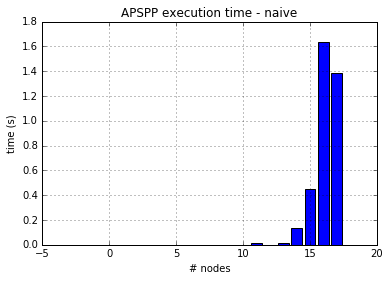

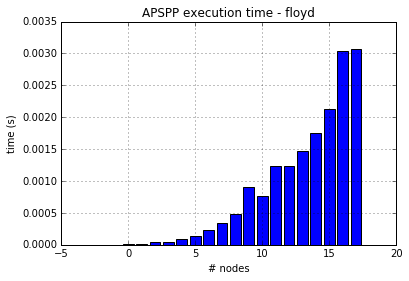

In [51]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.bar(range(len(times_naive)), times_naive.values(), align='center')

plt.xlabel('# nodes')
plt.ylabel('time (s)')
plt.title('APSPP execution time - naive')
plt.grid(True)
plt.show()

plt.bar(range(len(times_floyd)), times_floyd.values(), align='center')

plt.xlabel('# nodes')
plt.ylabel('time (s)')
plt.title('APSPP execution time - floyd')
plt.grid(True)
plt.show()

In [91]:
# Floyd Warshal

{'node_10': {'node_10': 1, 'node_9': 1, 'node_7': 1, 'node_5': 1, 'node_8': 1, 'node_4': 1, 'node_6': 1}, 'node_9': {'node_10': 1, 'node_9': 1, 'node_7': 1, 'node_5': 1, 'node_8': 1, 'node_4': 1, 'node_6': 1}, 'node_7': {'node_10': 1, 'node_9': 1, 'node_7': 1, 'node_5': 1, 'node_8': 1, 'node_4': 1, 'node_6': 1}, 'node_5': {'node_10': 1, 'node_9': 1, 'node_7': 1, 'node_5': 1, 'node_8': 1, 'node_4': 1, 'node_6': 1}, 'node_8': {'node_10': 1, 'node_9': 1, 'node_7': 1, 'node_5': 1, 'node_8': 1, 'node_4': 1, 'node_6': 1}, 'node_4': {'node_10': 1, 'node_9': 1, 'node_7': 1, 'node_5': 1, 'node_8': 1, 'node_4': 1, 'node_6': 1}, 'node_6': {'node_10': 1, 'node_9': 1, 'node_7': 1, 'node_5': 1, 'node_8': 1, 'node_4': 1, 'node_6': 1}}
